In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import json
import torchvision.models as models
import model_helper

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
#data
data_dir = "flower_data"
train_dir =  data_dir + "/train"
valid_dir =  data_dir + "/valid"
#categories names
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
len(cat_to_name)

102

In [4]:
train_loader = model_helper.create_dataloaders(train_dir) 
valid_loader = model_helper.create_dataloaders(valid_dir)

In [5]:
#Visualise some of the data
dataiterator = iter(train_loader)
imgs, labels = dataiterator.next()
imgs = imgs.numpy()
labels = labels.numpy()
print(imgs.shape)
print(labels.shape)

(64, 3, 224, 224)
(64,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

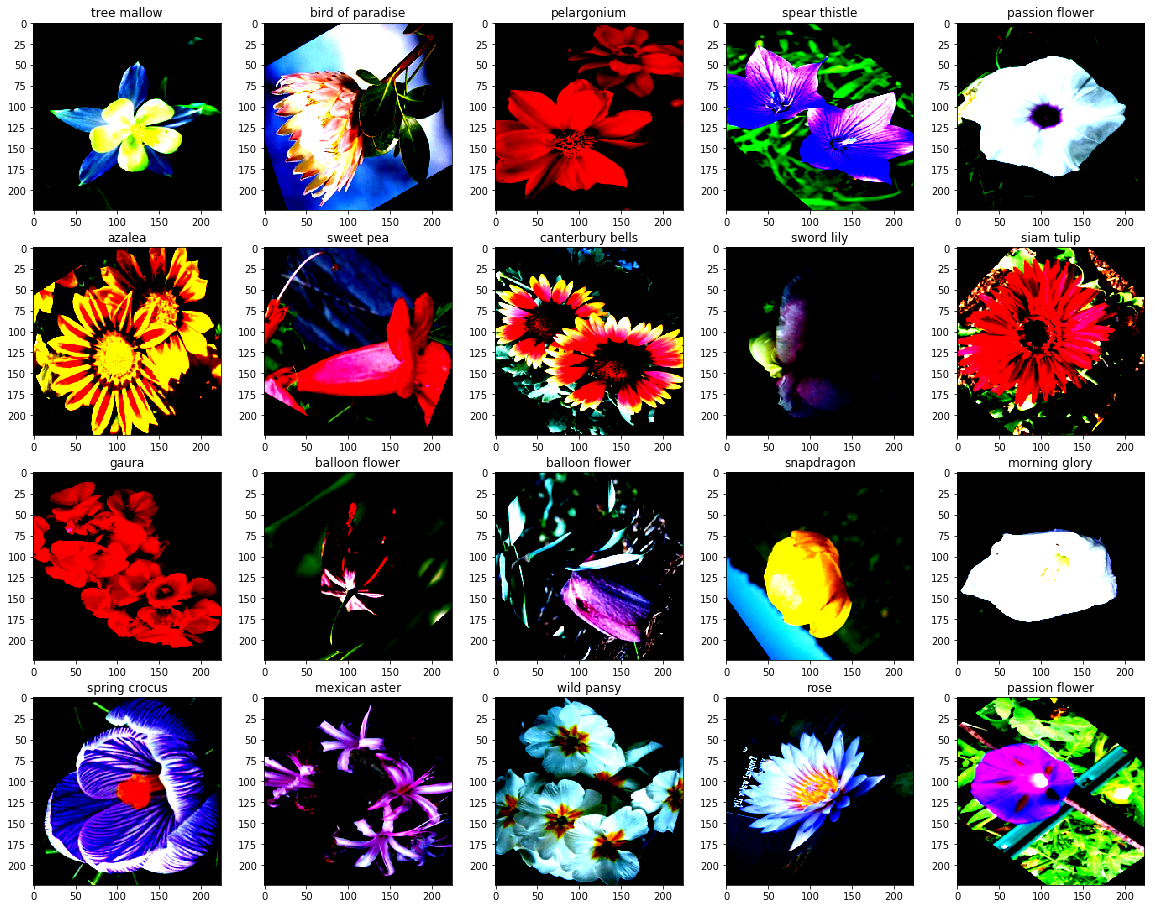

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
for indx in range(20):
    ax = fig.add_subplot(5,5,indx+1)
    plt.imshow(np.transpose((imgs[indx])))
    ax.set_title(cat_to_name[str(labels[indx]+1)])

In [7]:
model, criterion, optimizer = model_helper.create_model()
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=2048, bias=True)
    (3): ReLU()
    (4): Linear(in_f

In [9]:
model_helper.train_model(model,device,train_loader,valid_loader,criterion,optimizer,11)

Epoch: 1 
Training Loss: 38.205919 	Validation Loss: 2.907250	Validation Accuracy: 32%
Epoch: 11 
Training Loss: 1.839522 	Validation Loss: 2.048712	Validation Accuracy: 50%


In [8]:
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
